In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, ScalarFormatter
import numpy as np
import math

plt.rcParams["figure.figsize"] = (12,7)

v100_data = pd.read_csv('osmi-output/v100-results-localscratch.csv')
v100_data = v100_data[v100_data['BatchSize'] <= 1024]
small_v100_data = v100_data[v100_data['Model']=='small_lstm']
medium_v100_data = v100_data[v100_data['Model']=='medium_cnn']
large_v100_data = v100_data[v100_data['Model']=='large_tcnn']
v100_data

,Timestamp,GPU,# of GPUs,Server,Concurrency,Model,# of Requests,BatchSize,Theta (inf/s),Time to inference
0,17:17:34.877750,V100,1,1,1,small_lstm,32768,1,5.027828e+03,6.517327
1,17:17:41.398976,V100,1,1,2,small_lstm,32768,1,2.203535e+02,297.412985
2,17:22:38.911229,V100,1,1,4,small_lstm,32768,1,3.408857e+02,384.504256
3,17:29:03.549374,V100,1,1,6,small_lstm,32768,1,5.580013e+02,352.343260
4,17:34:56.032155,V100,1,1,8,small_lstm,32768,1,6.849002e+02,382.747748
...,...,...,...,...,...,...,...,...,...,...
180,01:48:31.767956,V100,1,1,1,large_tcnn,32768,1024,3.349081e+06,10.018997
181,01:48:41.789452,V100,1,1,2,large_tcnn,32768,1024,3.782617e+06,17.741385
182,01:48:59.549581,V100,1,1,4,large_tcnn,32768,1024,3.865477e+06,34.722163
183,01:49:34.312786,V100,1,1,6,large_tcnn,32768,1024,4.113221e+06,48.946212


In [2]:
a100_data = pd.read_csv('osmi-output/a100-results-localscratch.csv')
a100_data = a100_data[a100_data['BatchSize'] <= 1024]
small_a100_data = a100_data[a100_data['Model']=='small_lstm']
medium_a100_data = a100_data[a100_data['Model']=='medium_cnn']
large_a100_data = a100_data[a100_data['Model']=='large_tcnn']
a100_data

,Timestamp,GPU,# of GPUs,Server,Concurrency,Model,# of Requests,BatchSize,Theta (inf/s),Time to inference
0,21:37:18.097776,A100,1,1,1,small_lstm,32768,1,2.898254e+03,11.306118
1,21:37:29.407283,A100,1,1,2,small_lstm,32768,1,1.256962e+04,5.213839
2,21:37:34.632584,A100,1,1,4,small_lstm,32768,1,1.334496e+04,9.821836
3,21:37:44.503445,A100,1,1,6,small_lstm,32768,1,1.333992e+04,14.738318
4,21:37:59.287547,A100,1,1,8,small_lstm,32768,1,1.462365e+04,17.926028
...,...,...,...,...,...,...,...,...,...,...
183,19:23:56.992362,A100,1,1,1,large_tcnn,32768,1024,3.830386e+06,8.760065
184,19:24:05.754625,A100,1,1,2,large_tcnn,32768,1024,5.177404e+06,12.961876
185,19:24:18.725391,A100,1,1,4,large_tcnn,32768,1024,5.020592e+06,26.733447
186,19:24:45.513405,A100,1,1,6,large_tcnn,32768,1024,5.030742e+06,40.019267


In [3]:
cpu_data = pd.read_csv('osmi-output/cpu-results-localscratch.csv')
cpu_data = cpu_data[cpu_data['BatchSize'] <= 1024]
small_cpu_data = cpu_data[cpu_data['Model']=='small_lstm']
medium_cpu_data = cpu_data[cpu_data['Model']=='medium_cnn']
large_cpu_data = cpu_data[cpu_data['Model']=='large_tcnn']
cpu_data

,Timestamp,GPU,# of GPUs,Server,Concurrency,Model,# of Requests,BatchSize,Theta (inf/s),Time to inference
0,11:32:22.941477,CPU,1,1,1,small_lstm,32768,1,2.340067e+03,14.003018
1,11:32:36.948436,CPU,1,1,2,small_lstm,32768,1,1.007397e+04,6.505477
2,11:32:43.478151,CPU,1,1,4,small_lstm,32768,1,1.119919e+04,11.703708
3,11:32:55.215232,CPU,1,1,6,small_lstm,32768,1,1.083853e+04,18.139736
4,11:33:13.404246,CPU,1,1,8,small_lstm,32768,1,1.091375e+04,24.019608
...,...,...,...,...,...,...,...,...,...,...
180,12:18:43.092765,CPU,1,1,1,large_tcnn,32768,1024,3.078138e+06,10.900885
181,12:18:53.996281,CPU,1,1,2,large_tcnn,32768,1024,3.706597e+06,18.105252
182,12:19:12.112624,CPU,1,1,4,large_tcnn,32768,1024,3.864083e+06,34.734692
183,12:19:46.897462,CPU,1,1,6,large_tcnn,32768,1024,3.861086e+06,52.142482


In [4]:
from cloudmesh.common.Shell import Shell
def save_image(filename=None, dpi=300):
    # os.system("mkdir -p out")
    Shell.mkdir("out")
    plt.savefig(f"out/{filename}.png", dpi=dpi)
    plt.savefig(f"out/{filename}.svg")
    plt.savefig(f"out/{filename}.pdf")

/home/nkimball/.local/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Fig. 7.
Throughput vs. GPUs

In [5]:
# fig, ax = plt.subplots()
# ax.plot(small_data['# of GPUs'], small_data['Theta (inf/s)'], label='Throughput/Small')
# ax.plot(medium_data['# of GPUs'], medium_data['Theta (inf/s)'], label='Throughput/Medium')
# ax.plot(large_data['# of GPUs'], large_data['Theta (inf/s)'], label='Throughput/Large')

# ax.set_title('Throughput vs. GPUs')
# ax.set_xlabel('GPUs')
# ax.set_ylabel('Throughput (inf/s)')

# ax.legend()

# save_image("throughput-vs-gpus")

# plt.show()

Fig #. Theta vs. Batch size

Here, we are comparing the effects of batch size on throughput. Batchsize is the number of samples per request and throughput is the number of inferences per second. Throughput is calculated according to the formula $\theta = N*B/t$ where N is the number of requests sent to the server, B is the batch size, and t is the time to inference all N requests. For the following graphs, N is held constant at 32,768 requests. The total input size is a function of N*B. The three models used for the graphs are a small lstm model, a medium tcnn model, and a large cnn model. The small model takes input data of shape (8,48) and outputs data of shape (2,12), the medium model takes input data of shape (101,82,9) and outputs data of shape (101,82), and the large model takes input data of shape (3,101,82,9) and outputs data of shape (3,101,82,1). To perform regression on the data we took $log_2$ of the batch size and $log_{10}$ of the throughput, then fit a linear regression model to the data.

In [6]:
small_v100_data_1 = small_v100_data[small_v100_data['Concurrency']==1]
small_v100_data_2 = small_v100_data[small_v100_data['Concurrency']==2]
small_v100_data_4 = small_v100_data[small_v100_data['Concurrency']==4]
medium_v100_data_1 = medium_v100_data[medium_v100_data['Concurrency']==1]
medium_v100_data_2 = medium_v100_data[medium_v100_data['Concurrency']==2]
medium_v100_data_4 = medium_v100_data[medium_v100_data['Concurrency']==4]
large_v100_data_1 = large_v100_data[large_v100_data['Concurrency']==1]
large_v100_data_2 = large_v100_data[large_v100_data['Concurrency']==2]
large_v100_data_4 = large_v100_data[large_v100_data['Concurrency']==4]

s1_reg = np.polyfit(np.log2(small_v100_data_1['BatchSize']), np.log10(small_v100_data_1['Theta (inf/s)']), 1)
s2_reg = np.polyfit(np.log2(small_v100_data_2['BatchSize']), np.log10(small_v100_data_2['Theta (inf/s)']), 1)
s3_reg = np.polyfit(np.log2(small_v100_data_4['BatchSize']), np.log10(small_v100_data_4['Theta (inf/s)']), 1)
m1_reg = np.polyfit(np.log2(medium_v100_data_1['BatchSize']), np.log10(medium_v100_data_1['Theta (inf/s)']), 1)
m2_reg = np.polyfit(np.log2(medium_v100_data_2['BatchSize']), np.log10(medium_v100_data_2['Theta (inf/s)']), 1)
m4_reg = np.polyfit(np.log2(medium_v100_data_4['BatchSize']), np.log10(medium_v100_data_4['Theta (inf/s)']), 1)
l1_reg = np.polyfit(np.log2(large_v100_data_1['BatchSize']), np.log10(large_v100_data_1['Theta (inf/s)']), 1)
l2_reg = np.polyfit(np.log2(large_v100_data_2['BatchSize']), np.log10(large_v100_data_2['Theta (inf/s)']), 1)
l4_reg = np.polyfit(np.log2(large_v100_data_4['BatchSize']), np.log10(large_v100_data_4['Theta (inf/s)']), 1)

def formula(regression):
    return f"log(Θ)={regression[0]:.2f}log\u2082(b)+{regression[1]:.2f}"
    # return f"Θ=10^({regression[0]:.2f}log\u2082(b)+{regression[1]:.2f})"

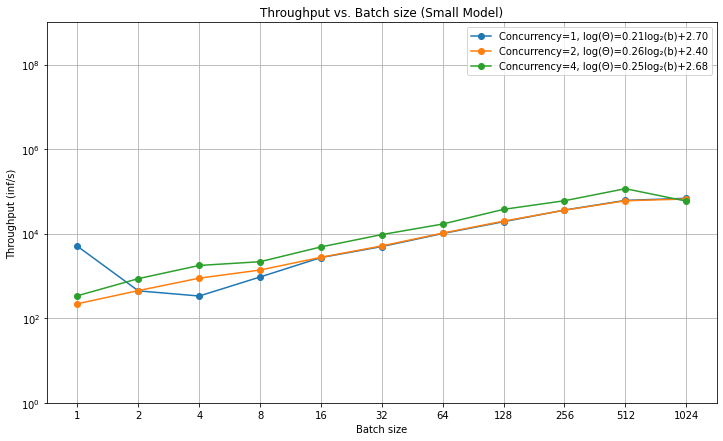

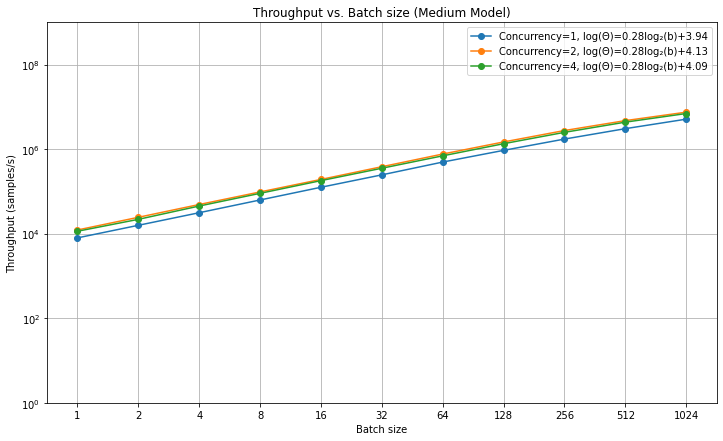

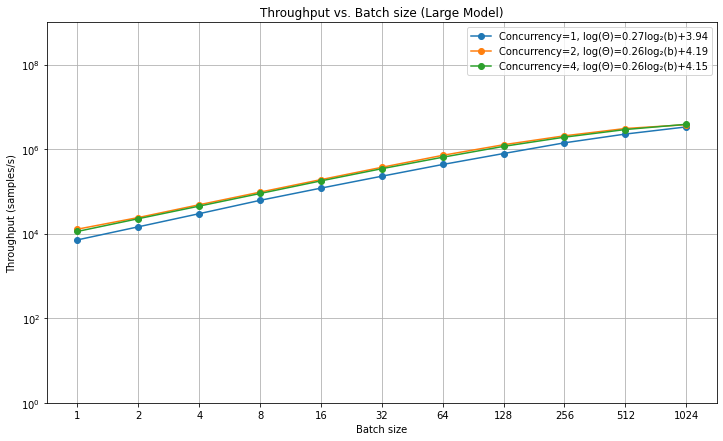

In [7]:

fig, ax = plt.subplots()
ax.plot(small_v100_data_1['BatchSize'], small_v100_data_1['Theta (inf/s)'], label=f'Concurrency=1, ' + formula(s1_reg), marker='o')
ax.plot(small_v100_data_2['BatchSize'], small_v100_data_2['Theta (inf/s)'], label=f'Concurrency=2, ' + formula(s2_reg), marker='o')
ax.plot(small_v100_data_4['BatchSize'], small_v100_data_4['Theta (inf/s)'], label=f'Concurrency=4, ' + formula(s3_reg), marker='o')
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=10)
ax.set_ylim([1, math.pow(10,9)])
plt.xticks(small_v100_data_1['BatchSize'])
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.grid(True)

ax.set_title('Throughput vs. Batch size (Small Model)')
ax.set_xlabel('Batch size')
ax.set_ylabel('Throughput (inf/s)')

ax.legend()

save_image("throughput-vs-batch-size(small-model)")

plt.show()

fig, ax = plt.subplots()
ax.plot(medium_v100_data_1['BatchSize'], medium_v100_data_1['Theta (inf/s)'], label='Concurrency=1, ' + formula(m1_reg), marker='o')
ax.plot(medium_v100_data_2['BatchSize'], medium_v100_data_2['Theta (inf/s)'], label='Concurrency=2, ' + formula(m2_reg), marker='o')
ax.plot(medium_v100_data_4['BatchSize'], medium_v100_data_4['Theta (inf/s)'], label='Concurrency=4, ' + formula(m4_reg), marker='o')
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=10)
ax.set_ylim([1, math.pow(10,9)])
plt.xticks(medium_v100_data_1['BatchSize'])
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.grid(True)

ax.set_title('Throughput vs. Batch size (Medium Model)')
ax.set_xlabel('Batch size')
ax.set_ylabel('Throughput (samples/s)')

ax.legend()

save_image("throughput-vs-batch-size(medium-model)")

plt.show()

fig, ax = plt.subplots()
ax.plot(large_v100_data_1['BatchSize'], large_v100_data_1['Theta (inf/s)'], label='Concurrency=1, ' + formula(l1_reg), marker='o')
ax.plot(large_v100_data_2['BatchSize'], large_v100_data_2['Theta (inf/s)'], label='Concurrency=2, ' + formula(l2_reg), marker='o')
ax.plot(large_v100_data_4['BatchSize'], large_v100_data_4['Theta (inf/s)'], label='Concurrency=4, ' + formula(l4_reg), marker='o')
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=10)
ax.set_ylim([1, math.pow(10,9)])
plt.xticks(large_v100_data_1['BatchSize'])
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.grid(True)

ax.set_title('Throughput vs. Batch size (Large Model)')
ax.set_xlabel('Batch size')
ax.set_ylabel('Throughput (samples/s)')

ax.legend()

save_image("throughput-vs-batch-size(large-model)")

plt.show()

Throughput vs. Batchsize

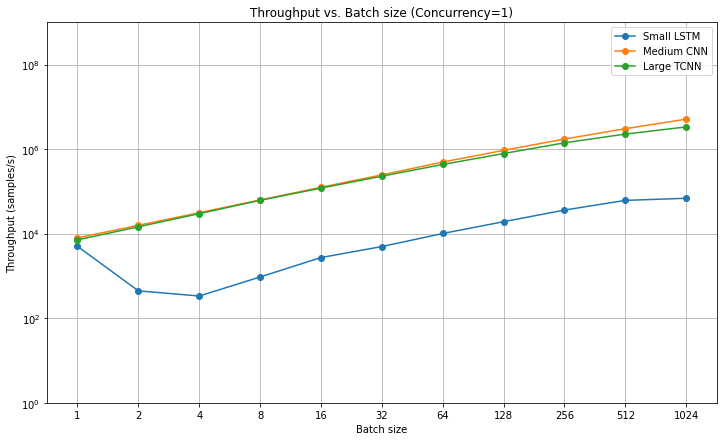

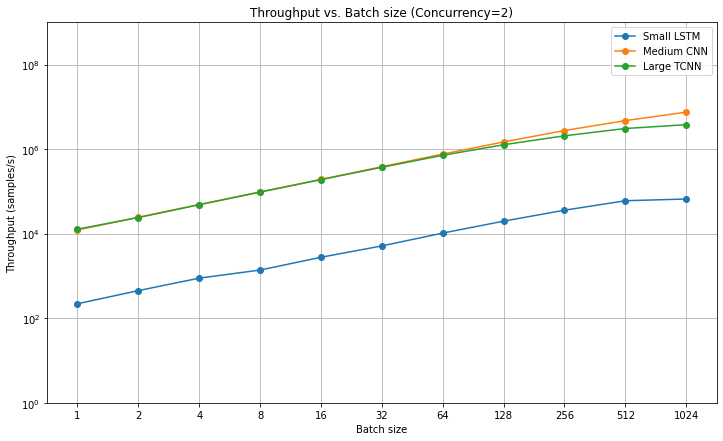

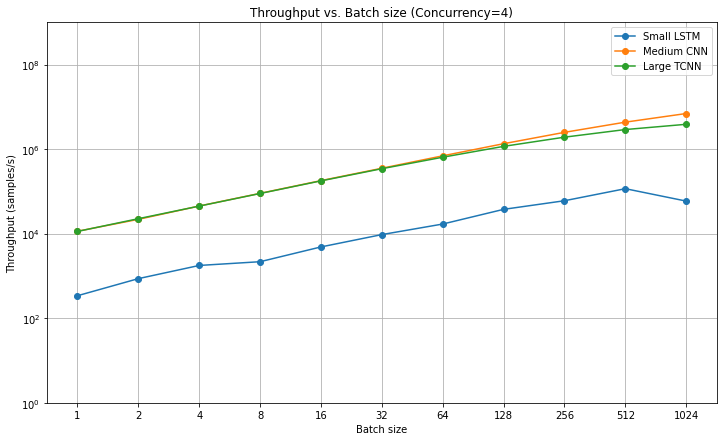

In [8]:
fig, ax = plt.subplots()
ax.plot(small_v100_data_1['BatchSize'], small_v100_data_1['Theta (inf/s)'], label='Small LSTM', marker='o')
ax.plot(medium_v100_data_1['BatchSize'], medium_v100_data_1['Theta (inf/s)'], label='Medium CNN', marker='o')
ax.plot(large_v100_data_1['BatchSize'], large_v100_data_1['Theta (inf/s)'], label='Large TCNN', marker='o')
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=10)
ax.set_ylim([1, math.pow(10,9)])
ax.grid(True)

plt.xticks(large_v100_data_1['BatchSize'])
ax.xaxis.set_major_formatter(ScalarFormatter())

ax.set_title('Throughput vs. Batch size (Concurrency=1)')
ax.set_xlabel('Batch size')
ax.set_ylabel('Throughput (samples/s)')
ax.legend()

save_image("throughput-vs-batch-size(concurrency=1)")

plt.show()

fig, ax = plt.subplots()
ax.plot(small_v100_data_2['BatchSize'], small_v100_data_2['Theta (inf/s)'], label='Small LSTM', marker='o')
ax.plot(medium_v100_data_2['BatchSize'], medium_v100_data_2['Theta (inf/s)'], label='Medium CNN', marker='o')
ax.plot(large_v100_data_2['BatchSize'], large_v100_data_2['Theta (inf/s)'], label='Large TCNN', marker='o')
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=10)
ax.set_ylim([1, math.pow(10,9)])
plt.xticks(large_v100_data_2['BatchSize'])
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.grid(True)

ax.set_title('Throughput vs. Batch size (Concurrency=2)')
ax.set_xlabel('Batch size')
ax.set_ylabel('Throughput (samples/s)')
ax.legend()

save_image("throughput-vs-batch-size(concurrency=2)")

plt.show()

fig, ax = plt.subplots()
ax.plot(small_v100_data_4['BatchSize'], small_v100_data_4['Theta (inf/s)'], label='Small LSTM', marker='o')
ax.plot(medium_v100_data_4['BatchSize'], medium_v100_data_4['Theta (inf/s)'], label='Medium CNN', marker='o')
ax.plot(large_v100_data_4['BatchSize'], large_v100_data_4['Theta (inf/s)'], label='Large TCNN', marker='o')
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=10)
ax.set_ylim([1, math.pow(10,9)])
plt.xticks(large_v100_data_2['BatchSize'])
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.grid(True)

ax.set_title('Throughput vs. Batch size (Concurrency=4)')
ax.set_xlabel('Batch size')
ax.set_ylabel('Throughput (samples/s)')
ax.legend()

save_image("throughput-vs-batch-size(concurrency=4)")

plt.show()

Fig #. Theta vs. Concurrency

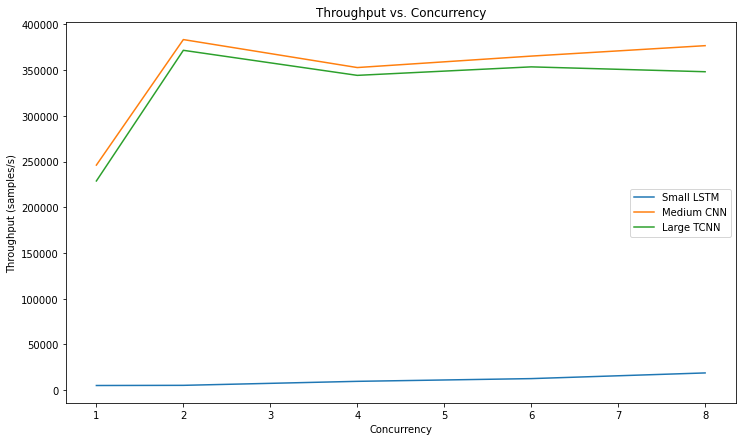

In [9]:
small_v100_data_b32 = small_v100_data[small_v100_data['BatchSize']==32]
medium_v100_data_b32 = medium_v100_data[medium_v100_data['BatchSize']==32]
large_v100_data_b32 = large_v100_data[large_v100_data['BatchSize']==32]

fig, ax = plt.subplots()
ax.plot(small_v100_data_b32['Concurrency'], small_v100_data_b32['Theta (inf/s)'], label='Small LSTM')
ax.plot(medium_v100_data_b32['Concurrency'], medium_v100_data_b32['Theta (inf/s)'], label='Medium CNN')
ax.plot(large_v100_data_b32['Concurrency'], large_v100_data_b32['Theta (inf/s)'], label='Large TCNN')

ax.set_title('Throughput vs. Concurrency')
ax.set_xlabel('Concurrency')
ax.set_ylabel('Throughput (samples/s)')

ax.legend()

save_image("throughput-vs-concurrency")

plt.show()

In [10]:
# K80, P100, V100, A100, RTX2080Ti, RTX3090
small_v100_data_c1 = small_v100_data[small_v100_data['Concurrency']==1]
medium_v100_data_c1 = medium_v100_data[medium_v100_data['Concurrency']==1]
large_v100_data_c1 = large_v100_data[large_v100_data['Concurrency']==1]

small_a100_data_c1 = small_a100_data[small_a100_data['Concurrency']==1]
medium_a100_data_c1 = medium_a100_data[medium_a100_data['Concurrency']==1]
large_a100_data_c1 = large_a100_data[large_a100_data['Concurrency']==1]

small_cpu_data_c1 = small_cpu_data[small_cpu_data['Concurrency']==1]
medium_cpu_data_c1 = medium_cpu_data[medium_cpu_data['Concurrency']==1]
large_cpu_data_c1 = large_cpu_data[large_cpu_data['Concurrency']==1]

small_v100_c1_b32 = small_v100_data_c1[small_v100_data_c1['BatchSize']==32]
medium_v100_c1_b32 = medium_v100_data_c1[medium_v100_data_c1['BatchSize']==32]
large_v100_c1_b32 = large_v100_data_c1[large_v100_data_c1['BatchSize']==32]

small_a100_c1_b32 = small_a100_data_c1[small_a100_data_c1['BatchSize']==32]
medium_a100_c1_b32 = medium_a100_data_c1[medium_a100_data_c1['BatchSize']==32]
large_a100_c1_b32 = large_a100_data_c1[large_a100_data_c1['BatchSize']==32]

small_cpu_c1_b32 = small_cpu_data_c1[small_cpu_data_c1['BatchSize']==32]
medium_cpu_c1_b32 = medium_cpu_data_c1[medium_cpu_data_c1['BatchSize']==32]
large_cpu_c1_b32 = large_cpu_data_c1[large_cpu_data_c1['BatchSize']==32]

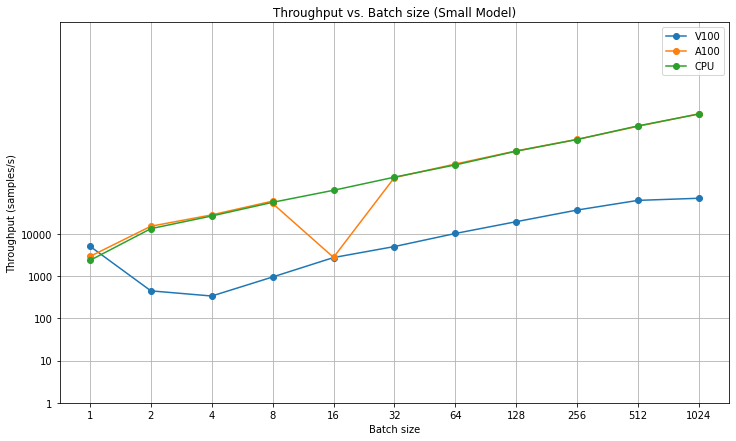

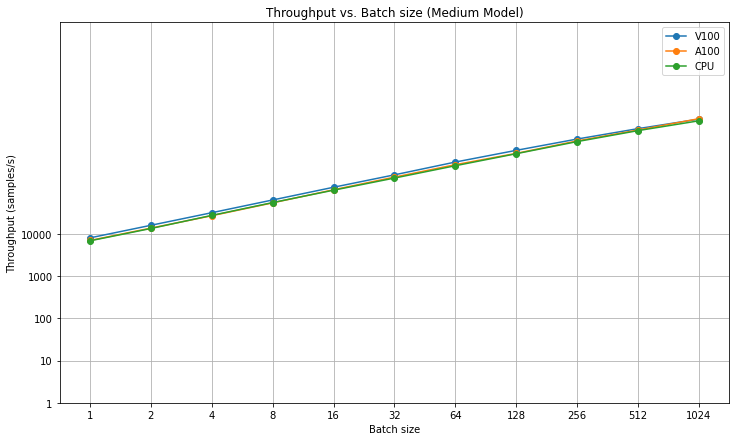

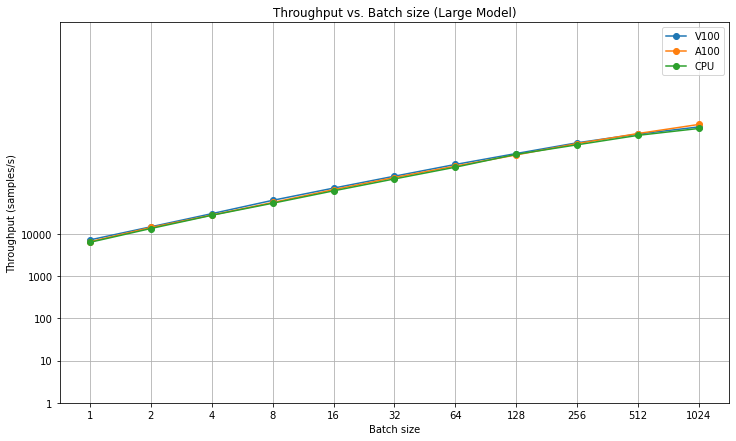

In [11]:
fig, ax = plt.subplots()
ax.plot(small_v100_data_c1['BatchSize'], small_v100_data_c1['Theta (inf/s)'], label='V100', marker='o')
ax.plot(small_a100_data_c1['BatchSize'], small_a100_data_c1['Theta (inf/s)'], label='A100', marker='o')
ax.plot(small_cpu_data_c1['BatchSize'], small_cpu_data_c1['Theta (inf/s)'], label='CPU', marker='o')
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=10)
ax.set_ylim([1, math.pow(10,9)])
plt.xticks(small_v100_data_1['BatchSize'])
plt.yticks([1, 10, 100, 1000, 10000])
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.grid(True)

ax.set_title('Throughput vs. Batch size (Small Model)')
ax.set_xlabel('Batch size')
ax.set_ylabel('Throughput (samples/s)')

ax.legend()

save_image("throughput-vs-batch-size(small-model)")

plt.show()

fig, ax = plt.subplots()
ax.plot(medium_v100_data_c1['BatchSize'], medium_v100_data_c1['Theta (inf/s)'], label='V100', marker='o')
ax.plot(medium_a100_data_c1['BatchSize'], medium_a100_data_c1['Theta (inf/s)'], label='A100', marker='o')
ax.plot(medium_cpu_data_c1['BatchSize'], medium_cpu_data_c1['Theta (inf/s)'], label='CPU', marker='o')
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=10)
ax.set_ylim([1, math.pow(10,9)])
plt.xticks(medium_v100_data_1['BatchSize'])
plt.yticks([1, 10, 100, 1000, 10000])
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.grid(True)

ax.set_title('Throughput vs. Batch size (Medium Model)')
ax.set_xlabel('Batch size')
ax.set_ylabel('Throughput (samples/s)')

ax.legend()

save_image("throughput-vs-batch-size(medium-model)")

plt.show()

fig, ax = plt.subplots()
ax.plot(large_v100_data_c1['BatchSize'], large_v100_data_c1['Theta (inf/s)'], label='V100', marker='o')
ax.plot(large_a100_data_c1['BatchSize'], large_a100_data_c1['Theta (inf/s)'], label='A100', marker='o')
ax.plot(large_cpu_data_c1['BatchSize'], large_cpu_data_c1['Theta (inf/s)'], label='CPU', marker='o')
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=10)
ax.set_ylim([1, math.pow(10,9)])
plt.xticks(large_v100_data_1['BatchSize'])
plt.yticks([1, 10, 100, 1000, 10000])
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.grid(True)

ax.set_title('Throughput vs. Batch size (Large Model)')
ax.set_xlabel('Batch size')
ax.set_ylabel('Throughput (samples/s)')

ax.legend()

save_image("throughput-vs-batch-size(large-model)")

plt.show()

Recreating fig. 4 from OSMI-Bench paper

In [12]:
a100_fig_4_data = pd.read_csv("osmi-output/a100-results-localscratch-fig4.csv")
v100_fig_4_data = pd.read_csv("osmi-output/v100-results-localscratch-fig4.csv")
cpu_fig_4_data = pd.read_csv("osmi-output/cpu-results-localscratch-fig4.csv")

a100_small_fig_4_data = a100_fig_4_data[a100_fig_4_data['Model']=='small_lstm']
v100_small_fig_4_data = v100_fig_4_data[v100_fig_4_data['Model']=='small_lstm']
cpu_small_fig_4_data = cpu_fig_4_data[cpu_fig_4_data['Model']=='small_lstm']

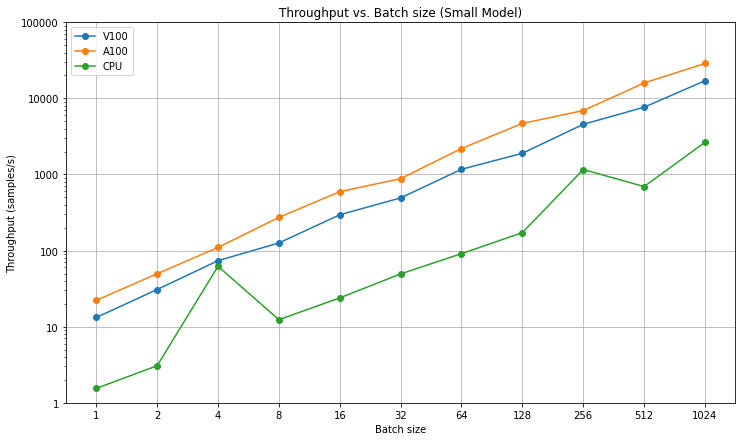

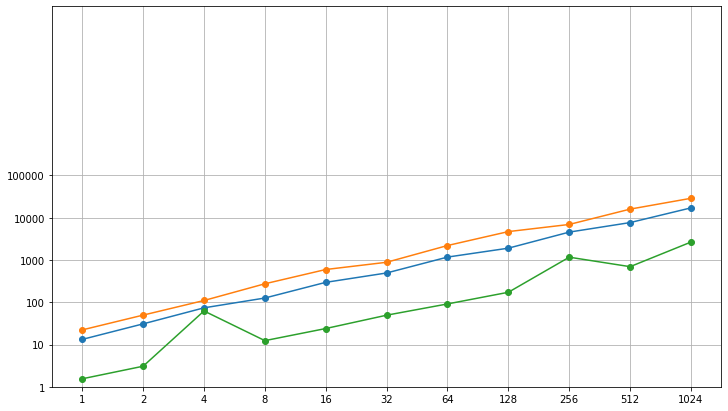

In [13]:
fig, ax = plt.subplots()
ax.plot(a100_small_fig_4_data['BatchSize'], a100_small_fig_4_data['Theta (inf/s)'], label='V100', marker='o')
ax.plot(v100_small_fig_4_data['BatchSize'], v100_small_fig_4_data['Theta (inf/s)'], label='A100', marker='o')
ax.plot(cpu_small_fig_4_data['BatchSize'], cpu_small_fig_4_data['Theta (inf/s)'], label='CPU', marker='o')
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=10)
ax.set_ylim([1, math.pow(10,5)])
plt.xticks(a100_small_fig_4_data['BatchSize'])
plt.yticks([1, 10, 100, 1000, 10000, 100000])
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.grid(True)

ax.set_title('Throughput vs. Batch size (Small Model)')
ax.set_xlabel('Batch size')
ax.set_ylabel('Throughput (samples/s)')

ax.legend()

save_image("throughput-vs-batch-size(small-model)")

plt.show()

fig, ax = plt.subplots()
ax.plot(a100_small_fig_4_data['BatchSize'], a100_small_fig_4_data['Theta (inf/s)'], label='V100', marker='o')
ax.plot(v100_small_fig_4_data['BatchSize'], v100_small_fig_4_data['Theta (inf/s)'], label='A100', marker='o')
ax.plot(cpu_small_fig_4_data['BatchSize'], cpu_small_fig_4_data['Theta (inf/s)'], label='CPU', marker='o')
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=10)
ax.set_ylim([1, math.pow(10,9)])
plt.xticks(medium_v100_data_1['BatchSize'])
plt.yticks([1, 10, 100, 1000, 10000, 100000])
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.grid(True)

# ax.set_title('Throughput vs. Batch size (Medium Model)')
# ax.set_xlabel('Batch size')
# ax.set_ylabel('Throughput (samples/s)')

# ax.legend()

# save_image("throughput-vs-batch-size(medium-model)")

# plt.show()

# fig, ax = plt.subplots()
# ax.plot(large_v100_data_c1['BatchSize'], large_v100_data_c1['Theta (inf/s)'], label='V100', marker='o')
# ax.plot(large_a100_data_c1['BatchSize'], large_a100_data_c1['Theta (inf/s)'], label='A100', marker='o')
# ax.plot(large_cpu_data_c1['BatchSize'], large_cpu_data_c1['Theta (inf/s)'], label='CPU', marker='o')
# ax.set_xscale('log', basex=2)
# ax.set_yscale('log', basey=10)
# ax.set_ylim([1, math.pow(10,9)])
# plt.xticks(large_v100_data_1['BatchSize'])
# plt.yticks([1, 10, 100, 1000, 10000])
# ax.xaxis.set_major_formatter(ScalarFormatter())
# ax.yaxis.set_major_formatter(ScalarFormatter())
# ax.grid(True)

# ax.set_title('Throughput vs. Batch size (Large Model)')
# ax.set_xlabel('Batch size')
# ax.set_ylabel('Throughput (samples/s)')

# ax.legend()

# save_image("throughput-vs-batch-size(large-model)")

# plt.show()

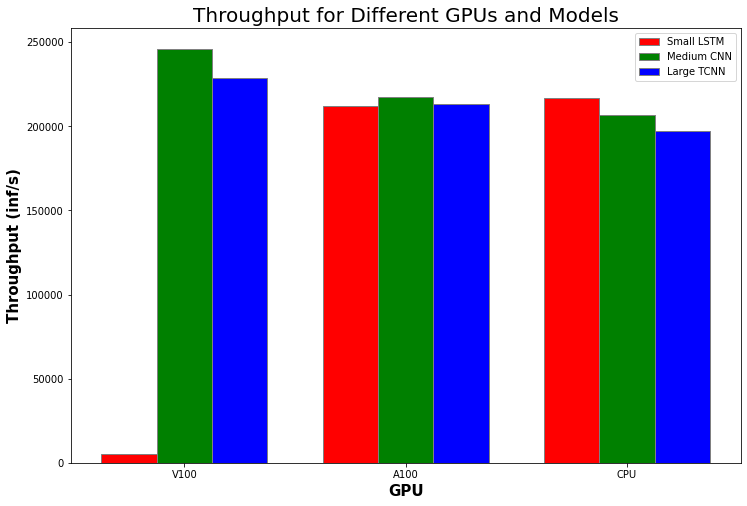

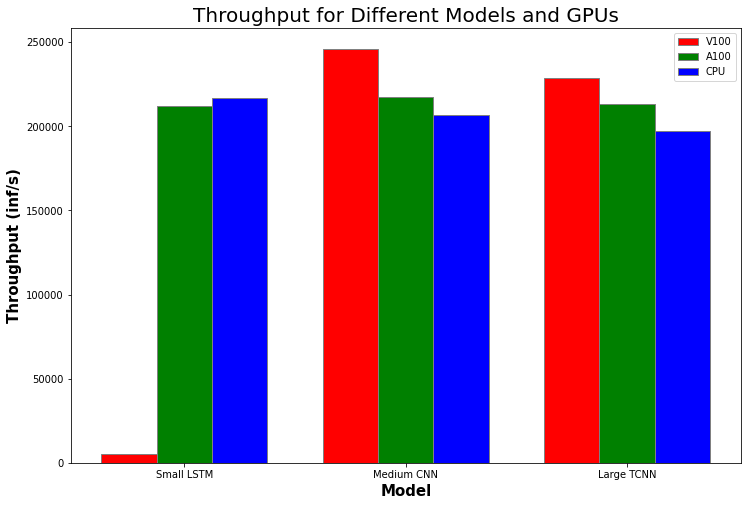

In [14]:

num_gpus = 3
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(num_gpus)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# br4 = [x + barWidth for x in br3]
# br5 = [x + barWidth for x in br4]
# br6 = [x + barWidth for x in br5]

small = [x['Theta (inf/s)'].values[0] for x in [small_v100_c1_b32, small_a100_c1_b32, small_cpu_c1_b32]]
medium = [x['Theta (inf/s)'].values[0] for x in [medium_v100_c1_b32, medium_a100_c1_b32, medium_cpu_c1_b32]]
large = [x['Theta (inf/s)'].values[0] for x in [large_v100_c1_b32, large_a100_c1_b32, large_cpu_c1_b32]]

plt.bar(br1, small, color ='r', width = barWidth,
        edgecolor ='grey', label ='Small LSTM')
plt.bar(br2, medium, color ='g', width = barWidth,
        edgecolor ='grey', label ='Medium CNN')
plt.bar(br3, large, color ='b', width = barWidth,
        edgecolor ='grey', label ='Large TCNN')

# Adding Xticks
plt.xlabel('GPU', fontweight ='bold', fontsize = 15)
plt.ylabel('Throughput (inf/s)', fontweight ='bold', fontsize = 15)
plt.xticks([r+barWidth for r in range(num_gpus)],
        ['V100', 'A100', 'CPU'])
plt.title('Throughput for Different GPUs and Models', fontsize=20)

plt.legend()
# plt.show()
save_image('gpu_throughput')

fig = plt.subplots(figsize =(12, 8))

br1 = np.arange(3)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# br4 = [x + barWidth for x in br3]
# br5 = [x + barWidth for x in br4]
# br6 = [x + barWidth for x in br5]

v100 = [x['Theta (inf/s)'].values[0] for x in [small_v100_c1_b32, medium_v100_c1_b32, large_v100_c1_b32]]
a100 = [x['Theta (inf/s)'].values[0] for x in [small_a100_c1_b32, medium_a100_c1_b32, large_a100_c1_b32]]
cpu = [x['Theta (inf/s)'].values[0] for x in [small_cpu_c1_b32, medium_cpu_c1_b32, large_cpu_c1_b32]]

plt.bar(br1, v100, color ='r', width = barWidth,
        edgecolor ='grey', label ='V100')
plt.bar(br2, a100, color ='g', width = barWidth,
        edgecolor ='grey', label ='A100')
plt.bar(br3, cpu, color ='b', width = barWidth,
        edgecolor ='grey', label ='CPU')

# Adding Xticks
plt.xlabel('Model', fontweight ='bold', fontsize = 15)
plt.ylabel('Throughput (inf/s)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(3)],
        ['Small LSTM', 'Medium CNN', 'Large TCNN'])
plt.title('Throughput for Different Models and GPUs', fontsize=20)
plt.legend()

save_image('model_throughput')

graph higher concurrencies
graph throughput for multiple gpus
redo all graphs with v100s



# keep increasing batchsize until throughput drops
# set nrequests to 32768
# plot total time to inference 32768 inferences
# plot throughput vs batchsize for different gpus
# plot throughput vs concurrency for different gpus
# writeup: define throughput, small, medium, large, concurrency...
# run regression on graphs
# increase batchsize and find maximum throughput
# use same y-axis for all 3 graphs

create 3 new graphs, throughput/concurrency for fixed concurrency, plot each model as a line